In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [9]:
#Modify Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

print(df.head())

df.drop(columns=["customerID","gender"], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
# Data Analysis

print(df.isnull().sum())

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.dtypes) 

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


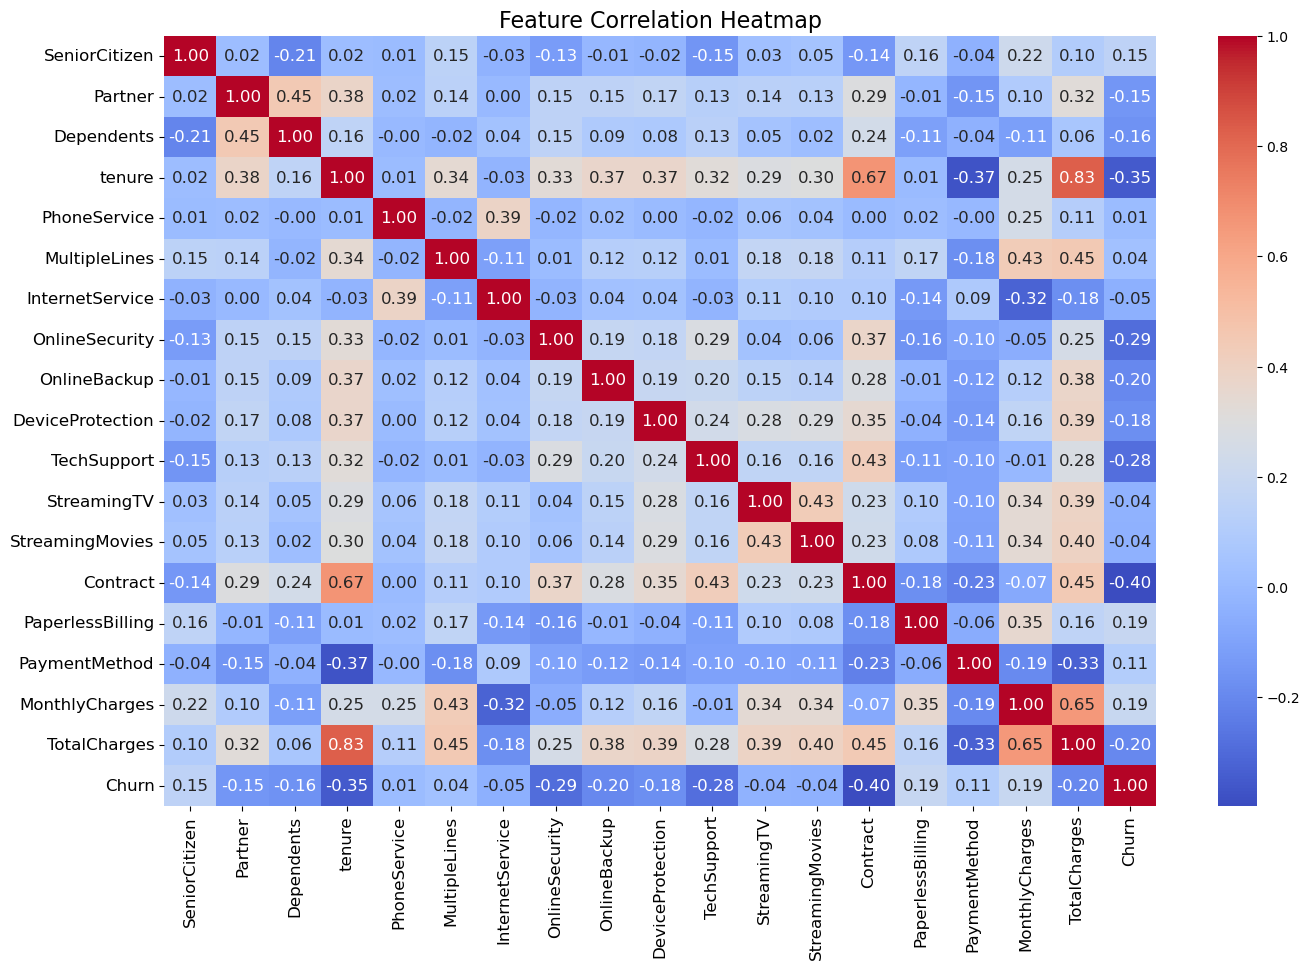

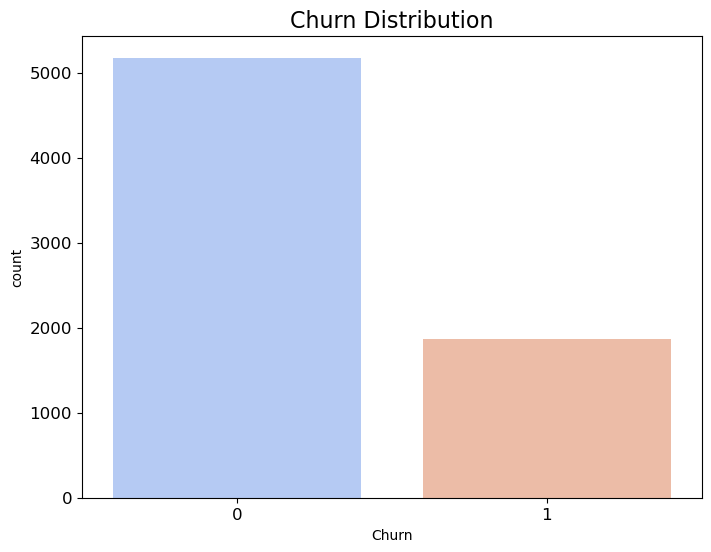

In [4]:
#Data Visualization
plt.figure(figsize=(16, 10)) 
sns.heatmap(
    df.corr(), 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f",  
    annot_kws={"size": 12} 
)
plt.title("Feature Correlation Heatmap", fontsize=16)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.show()

# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette="coolwarm", hue='Churn', legend=False)
plt.title("Churn Distribution", fontsize=16)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.show()

In [5]:
# Feature Extraction & Data Preprocessing
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]    

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

pickle.dump(scaler, open("scaler.pkl", "wb"))


In [6]:
# Model Training
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))
pickle.dump(rf_model, open("rf_model.pkl", "wb"))

XGBoost Model Analysis:
Accuracy: 0.8070
AUC Score: 0.8576
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Random Forest Model Analysis:
Accuracy: 0.8013
AUC Score: 0.8619
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



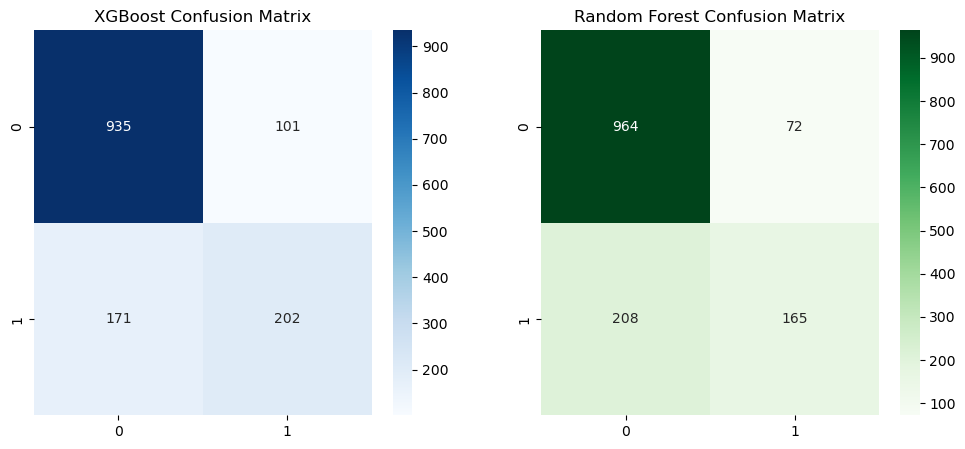

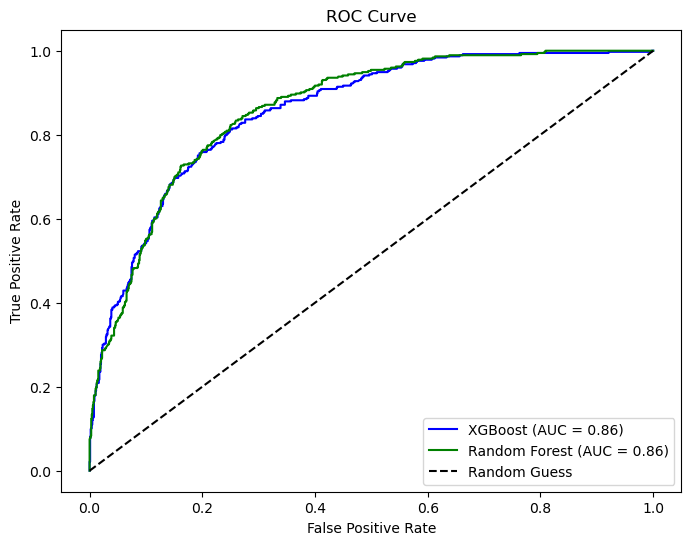

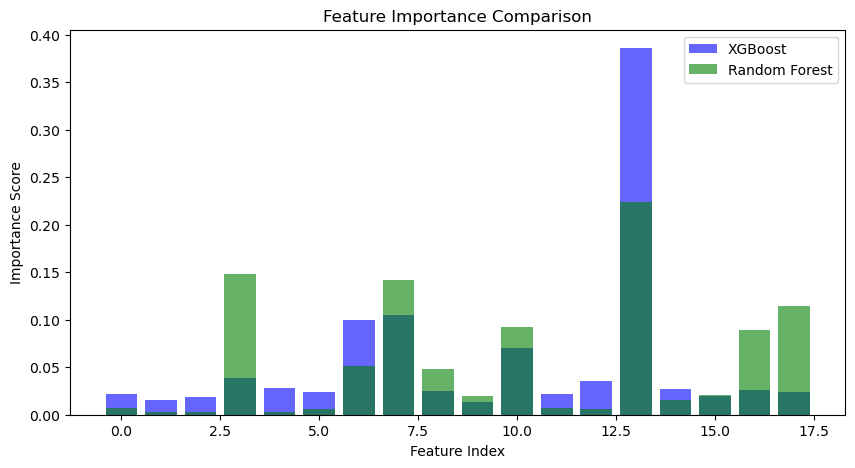

In [12]:
#Model Analysis

xgb_preds = xgb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

xgb_acc = accuracy_score(y_test, xgb_preds)
rf_acc = accuracy_score(y_test, rf_preds)

xgb_report = classification_report(y_test, xgb_preds)
rf_report = classification_report(y_test, rf_preds)

xgb_cm = confusion_matrix(y_test, xgb_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

xgb_auc = roc_auc_score(y_test, xgb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print("XGBoost Model Analysis:")
print(f"Accuracy: {xgb_acc:.4f}")
print(f"AUC Score: {xgb_auc:.4f}")
print(xgb_report)

print("\nRandom Forest Model Analysis:")
print(f"Accuracy: {rf_acc:.4f}")
print(f"AUC Score: {rf_auc:.4f}")
print(rf_report)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

xgb_importance = xgb_model.feature_importances_
rf_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(range(len(xgb_importance)), xgb_importance, color='blue', alpha=0.6, label="XGBoost")
plt.bar(range(len(rf_importance)), rf_importance, color='green', alpha=0.6, label="Random Forest")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()

